# Costa Rican Household Poverty Level Prediction
*From Kaggle ([competition link](https://www.kaggle.com/c/costa-rican-household-poverty-prediction))*
  
**By Nema Sobhani & David LaCharite**

## Summary

Income qualification for poor families in Costa Rica to determing need for aid. Data gathered from the *Inter-American Development Bank.*

## Imports

In [19]:
# General tools
import pandas as pd
import numpy as np

# Functions
from functions import *

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
from pprint import pprint

# Classification
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

# Big Picture

## Problem

To offer an better model than the Proxy Means Test (PMT) for predicting social need (welfare) for Costa Rican households.

## Dataset

The response variable (Target) indicates poverty level (1 = extreme poverty, 2 = moderate poverty, 3 = vulnerable households, 4 = non vulnerable households).

There are 142 additional feautures covering identifiers, family relations, age, sex, education, marriage status, disabilities, region of residence, property information (rent/rooms/size/occupants/own-or-rent), appliance ownership, presence of water/electric and other utilites, electronics (mobile and tablets), property material information (floor, wall, and ceiling construction), and select transformed (squared) variables.

## Motivation

This dataset is very robust and interesting. We are interested in looking at poverty on the individual level, finding which features have the largest effect on predicting poverty, and which predictive models are the most accurate.

# Data Exploration / Visualization

(Explanatory Variable details are in **00_Feature_Descriptions.ipynb**)

In [20]:
df = pd.read_csv('train.csv')

print(df.shape)
df.head()

(9557, 143)


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [21]:
df.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

## Response Variable (Target)

(1 = extreme poverty, 2 = moderate poverty, 3 = vulnerable households, 4 = non vulnerable households)

Text(0.5, 1.0, 'Poverty Level Counts')

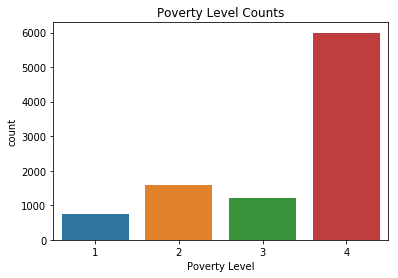

In [22]:
countByTarget = df.groupby(df.Target).count().Id

sns.countplot(df.Target)
plt.xlabel("Poverty Level")
plt.title("Poverty Level Counts")

## Property Information

### Number of Households

In [23]:
df.groupby(df.idhogar).count().shape[0]

2988

### Heads of Households


In [24]:
df.parentesco1.sum()

2973

### Monthly Rent

Missing rent values: 71.78%


Text(0.5, 1.0, 'Distribution of Monthly Rent')

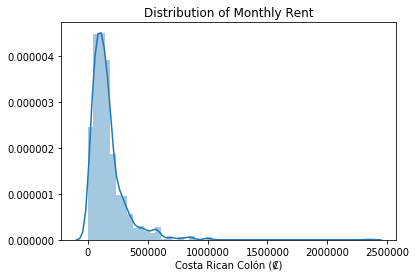

In [25]:
# Proportion of NaN values
print(f"Missing rent values: {df.v2a1.isna().sum() / len(df.v2a1) * 100:.2f}%")

sns.distplot(df.v2a1.dropna())
plt.xlabel("Costa Rican Colón (₡)")
plt.title("Distribution of Monthly Rent")

### Age Distribution

Text(0.5, 1.0, 'Distribution of Age')

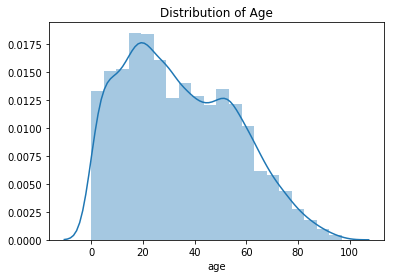

In [26]:
sns.distplot(df.age, bins=20)
plt.title("Distribution of Age")

### Sex and Education of Adults 18+

Text(0, 0.5, 'Education (Years)')

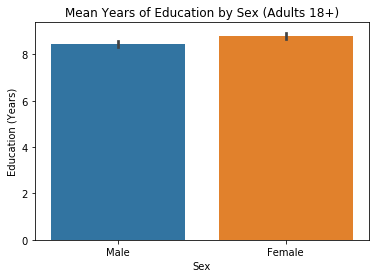

In [27]:
df_sex = df.loc[df.age >= 18,['escolari', 'male', 'female']]
df_sex['sex'] = np.nan

df_sex.loc[df_sex.male==1, 'sex'] = "Male"
df_sex.loc[df_sex.female==1, 'sex'] = "Female"

sns.barplot(df_sex.sex, df.escolari)
plt.title("Mean Years of Education by Sex (Adults 18+)")
plt.xlabel("Sex")
plt.ylabel("Education (Years)")

### Utilities Access

(by percent of total sample)

In [28]:
print(f"No water provision: {df.abastaguano.sum() / len(df) * 100:.2f}%")

print(f"No electricity provision: {df.noelec.sum() / len(df) * 100:.2f}%")

print(f"No toilet in dwelling: {df.sanitario1.sum() / len(df) * 100:.2f}%")

print(f"No kitchen: {df.energcocinar1.sum() / len(df) * 100:.2f}%")

print(f"No refrigerator: {(len(df)-df.refrig.sum()) / len(df) * 100:.2f}%")

No water provision: 0.36%
No electricity provision: 0.22%
No toilet in dwelling: 0.39%
No kitchen: 0.19%
No refrigerator: 4.24%


### Technology Access

(by percent of total sample)

In [29]:
print(f"Owns mobile phone: {df.mobilephone.sum() / len(df) * 100:.2f}%")

print(f"Owns tablet: {df.v18q.sum() / len(df) * 100:.2f}%")

print(f"Computer in household: {df.computer.sum() / len(df) * 100:.2f}%")

print(f"Television in household: {df.television.sum() / len(df) * 100:.2f}%")

Owns mobile phone: 97.53%
Owns tablet: 23.18%
Computer in household: 10.21%
Television in household: 28.46%


### Property Condition

(by percent of total sample)

In [30]:
print(f"Walls are bad: {df.epared1.sum() / len(df) * 100:.2f}%")

print(f"Roof is bad: {df.etecho1.sum() / len(df) * 100:.2f}%")

print(f"Floors are bad: {df.eviv1.sum() / len(df) * 100:.2f}%")

all_bad = df[(df.epared1 == 1) & (df.etecho1 == 1) & (df.eviv1 == 1)].shape[0]

print(f"\nAll three bad: {all_bad / len(df) * 100:.2f}%")

Walls are bad: 10.24%
Roof is bad: 12.84%
Floors are bad: 10.11%

All three bad: 5.93%


# Cleaning

## Missing Values

In [31]:
# 5 columns with NaN values
cols_nan = list(df.columns[df.isna().any()])
cols_nan

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']

In [32]:
# Total number of missing values
df[cols_nan].isna().sum()

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [33]:
# Proportion of missing values
df[cols_nan].isna().sum() / df.shape[0]

v2a1         0.717798
v18q1        0.768233
rez_esc      0.829549
meaneduc     0.000523
SQBmeaned    0.000523
dtype: float64

## Approach

Three features have very large number of missing values (72-83%).

### **v2a1** (*monthly rent payment*)  
We first dropped this feature and moved on to classification. Once we had a robust model, we came back and used it to predict rent and fill these values accordingly (random forest did best for this application).

### **v18q1** (*number of tablets in household*)  
Households with missing values contained missing values for all individuals, so we will set those to 0.

### **rez_esc** (*years behind in school*)  
Without domain knowledge in how to replace this data, field is dropped.

### **meaneduc** (*avg years education for adults (18+)*)  
Will take mean of mean education level for adults in household and apply to these individuals.

### **SQBmeaned** (*meaneduc squared*)  
Will square value found from **meaneduc**

## Vague / Noisey Features

### edjefe / edjefa / dependency

These columns have the following potential values:  
- *yes*
- *no*
- *float*
  
These variables will be dropped until we understanding how the variables are setup (not clear from the kaggle competition).

## Cleaning Function

Using all of the above approaches, we will create a function to do all at once.

In [34]:
def dataframe_generator(data, rent=False):
    
    # Load dataframe
    df = pd.read_csv(data)
    
    
    #_______________________________
    # RENT
    #_______________________________
    
    if rent == False:
        df.drop('v2a1', axis=1, inplace=True)
      
    
    #_______________________________
    # NUMBER OF TABLETS
    #_______________________________
    
    df.v18q1.fillna(0, inplace=True)

    
    #_______________________________
    # YEARS BEHIND IN SCHOOL
    #_______________________________
    
    df.drop("rez_esc", axis=1, inplace=True)
    
    
    #_______________________________
    # MIXED CATEGORY VARIABLES
    #_______________________________
    
    df.drop(columns=['edjefe', 'edjefa', 'dependency'], inplace=True)
    
    
    #_______________________________
    # EDUCATION
    #_______________________________
    
    # Find missing education value ids
    missing_ids = df[df['meaneduc'].isna()]['meaneduc'].keys()
    
    # Adult (18+) education by household
    educ_by_household = df[df.age >= 18].groupby('idhogar')['escolari'].mean()
    
    # Iterate over missing values and set them to correct value
    for i in missing_ids:
    
        household = df.loc[i, 'idhogar']
        
        # Update 'meaneduc'
        try:
            df.loc[i, 'meaneduc'] = educ_by_household[household]
        except:
            df.loc[i, 'meaneduc'] = 0
        
        # Update 'SQBmeaned'
        try:
            df.loc[i, 'SQBmeaned'] = educ_by_household[household] ** 2
        except:
            df.loc[i, 'SQBmeaned'] = 0
      
    
    #_______________________________
    # DROPPING IDENTIFIERS
    #_______________________________
    
#     df.drop(columns=['Id', 'idhogar'], inplace=True)

    
    return df

In [35]:
df = dataframe_generator('train.csv')
print(df.shape)
print(df.isna().sum().sum())
df.head()

(9557, 138)
0


,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


# Feature Engineering

## Rent Prediction

We decided to use regression models to predict **rent** as an approach to filling missing values to increase our power in predicting **poverty level**.  


After testing with tree-style classifiers (Random Forrest, XGBoost) and linear models (Linear Regression, RidgeCV, LassoCV, ElasticNetCV), we found that **Random Forest Regression** gave the highest scores in predicting rent.

### DataFrame Setup

In [36]:
# Setting up new dataframe (including rent data)
df_rent = dataframe_generator('train.csv', rent=True)

In [37]:
print("Missing values of explanatory variables:", df_rent.drop(columns='v2a1').isna().sum().sum())
print("Missing values of target variable (rent):", df_rent.v2a1.isna().sum())

Missing values of explanatory variables: 0
Missing values of target variable (rent): 6860


### Classification Setup

In [38]:
# Rent Prediction Function
def dataframe_generator_rent(data):
    
    #_______________________________
    # DATAFRAME SETUP
    #_______________________________
    
    # Setting up new dataframe (including rent data)
    df_rent = dataframe_generator(data, rent=True)
    
    # Remove missing values for target (rent)
    df_rent_predict = df_rent.dropna()

    
    #_______________________________
    # CLASSIFICATION SETUP
    #_______________________________
    
    # Partition explanatory and response variables
    X = df_rent_predict.drop(columns=['v2a1', 'Id', 'idhogar'])
    y = df_rent_predict['v2a1']

    # Split into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)
    
    
    #_______________________________
    # CLASSIFICATION 
    # (using random forest because it consistently gave highest score)
    #_______________________________
    
    # Random Forest
    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    # print(clf.score(X_test, y_test))
    
    
    #_______________________________
    # FILL NAN USING PREDICTED VALUES FROM MODEL
    #_______________________________
    
    # Prepare data to fill in predicted values for rent
    df_rent_nan = df_rent[df_rent.v2a1.isna()]
    
    # Predict using model
    rent_pred = clf.predict(df_rent_nan.drop(columns=['v2a1', 'Id', 'idhogar']))
    
    # Fill NaN
    df_rent_nan['v2a1'] = pd.DataFrame(rent_pred).values
    
    # Update full dataframe
    df_rent[df_rent.v2a1.isna()] = df_rent_nan
    
    
    return df_rent

In [39]:
df_rent = dataframe_generator_rent('train.csv')

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Transformations

Using the top 8 features (determined from classification on full model without rent) along with their *squares* and *logs*, we took random subsets of size 8 up to size 24 (with many trials) and classified them to determine which subset resulted in the greatest increase in predictive scoring.

(see **02_Feature_Engineering.ipynb** for details on subset selection)

## Dataframe with Transformed Features 

(using best subset from random sampling)

In [40]:
# Transformed DataFrame Generator
def dataframe_generator_trans(data):
    
    # Top Features
    top_features = ['v2a1', 'meaneduc', 'SQBedjefe', 'overcrowding', 'SQBdependency', 'age', 'rooms', 'qmobilephone']

    # Best subset
    winner = \
            [['SQ_SQBedjefe',
              'LOG_qmobilephone',
              'SQ_v2a1',
              'SQBdependency',
              'SQBedjefe',
              'meaneduc',
              'qmobilephone',
              'rooms',
              'LOG_meaneduc',
              'SQ_qmobilephone',
              'v2a1',
              'SQ_overcrowding',
              'LOG_SQBdependency'],
             13,
             0.9257322175732218,
             0.8887133182436542]
            
    # Create rent-inclusive dataframe
    df_rent = dataframe_generator_rent(data)
    
    # Create transformed dataframe
    df_trans = df_rent.copy(deep=True)
    df_trans.drop(columns=top_features, inplace=True)

    for feature in winner[0]:
        if "SQ_" in feature:
            col = feature.split("SQ_")[1]
            df_trans[feature] = df_rent[col] ** 2

        elif "LOG_" in feature:
            col = feature.split("LOG_")[1]
            df_trans[feature] = df_rent[col].apply(lambda x: np.log(x) if x!=0 else x)

        else:
            col = feature
            df_trans[feature] = df_rent[col]
            
    return df_trans

In [41]:
df_trans = dataframe_generator_trans("train.csv")

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Classification

We now have three data preparations:

DataFrame | Predicted Rent? | Transformed?
--- | --- | ---
df | NO | NO
df_rent | YES | NO
df_trans | YES | YES

Both **df_rent** and **df_trans** gave the best scores in our model selection, so we will use **df_trans** going forward in this report.

(to see all comparisons and model evaluations, please see **03_Classification.ipynb**)

## Setup

In [42]:
X = df_trans.drop(columns=['Target', 'Id', 'idhogar'])
y = df_trans.Target
print(X.shape, y.shape)

(9557, 141) (9557,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

## Linear Regression

In [44]:
clf_linear = LinearRegression()

In [45]:
clf_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
y_pred = clf_linear.predict(X_test)
y_pred = y_pred.round()
y_pred = y_pred.astype(int)

df_test = pd.DataFrame([y_pred, y_test], index=['ypred', 'ytest'])
df_test = df_test.transpose()
df_test['correct'] = df_test['ypred'] == df_test['ytest']
df_test.correct.mean()

0.5026150627615062

In [47]:
# f1 Scores are intended for multiclassification models, not regression, but we were curious to see what would happen
f1_linear = f1_score(y_test, y_pred, average='macro')
f1_linear

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.287717880504304

## Multinomial Logistic Regression

In [48]:
clf_multiclass_logistic = LogisticRegressionCV(cv=10, class_weight='balanced', multi_class='multinomial', max_iter=1000)

In [49]:
clf_multiclass_logistic.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [50]:
clf_multiclass_logistic.score(X_test, y_test)

0.6265690376569037

In [51]:
y_pred_log_reg = clf_multiclass_logistic.predict(X_test)

f1_logistic = f1_score(y_test, y_pred_log_reg, average='macro')
f1_logistic

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.19260450160771705

## SVM

In [52]:
clf_SVM = SVC()

In [53]:
clf_SVM.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [54]:
clf_SVM.score(X_test, y_test)

0.6317991631799164

In [55]:
y_pred_SVM = clf_SVM.predict(X_test)

f1_SVM = f1_score(y_test, y_pred_SVM, average='macro')
f1_SVM

0.207876825155869

## Random Forest

In [56]:
clf_RF = RandomForestClassifier()

In [57]:
clf_RF.fit(X_train, y_train)

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
clf_RF.score(X_test, y_test)

0.9252092050209205

In [59]:
y_pred_RF = clf_RF.predict(X_test)

f1_RF = f1_score(y_test, y_pred_RF, average='macro')
f1_RF

0.8858953066901855

### Feature Importance (Random Forest)

In [60]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
v2a1,0.052319
SQ_v2a1,0.051262
SQBmeaned,0.044429
LOG_meaneduc,0.039932
SQBdependency,0.033140
meaneduc,0.031889
SQ_overcrowding,0.030422
hogar_nin,0.020646
SQBedjefe,0.019559
SQBovercrowding,0.018698


## XGBoost

In [61]:
clf_xgb = xgb.XGBClassifier(max_depth=6,n_estimators=100, n_jobs=-1, subsample=.7)

In [62]:
clf_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-merror:0.266841	validation_1-merror:0.283473
[1]	validation_0-merror:0.255984	validation_1-merror:0.27772
[2]	validation_0-merror:0.241465	validation_1-merror:0.264121
[3]	validation_0-merror:0.233617	validation_1-merror:0.255753
[4]	validation_0-merror:0.232701	validation_1-merror:0.258891
[5]	validation_0-merror:0.231785	validation_1-merror:0.258891
[6]	validation_0-merror:0.230347	validation_1-merror:0.254184
[7]	validation_0-merror:0.225638	validation_1-merror:0.252615
[8]	validation_0-merror:0.218705	validation_1-merror:0.247385
[9]	validation_0-merror:0.213996	validation_1-merror:0.248954
[10]	validation_0-merror:0.21138	validation_1-merror:0.246862
[11]	validation_0-merror:0.211118	validation_1-merror:0.243201
[12]	validation_0-merror:0.207194	validation_1-merror:0.23954
[13]	validation_0-merror:0.207979	validation_1-merror:0.238494
[14]	validation_0-merror:0.205625	validation_1-merror:0.240586
[15]	validation_0-merror:0.204447	validation_1-merror:0.235356
[16]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [63]:
clf_xgb.score(X_test, y_test)

0.852510460251046

In [64]:
y_pred_xgb = clf_xgb.predict(X_test)

f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
f1_xgb

0.7759751967116435

### Feature Importance (XGBoost)

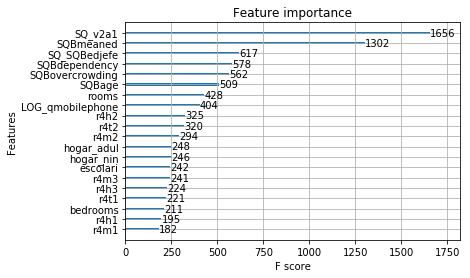

In [65]:
xgb.plot_importance(clf_xgb, max_num_features=20)

## Model Comparison

In [66]:
f1_scores = [f1_linear, f1_logistic, f1_SVM, f1_RF, f1_xgb]
pprint(pd.DataFrame(f1_scores, columns=['f1 score'], index=['f1_linear', 'f1_logistic', 'f1_SVM', 'f1_RF', 'f1_xgb']))

             f1 score
f1_linear    0.287718
f1_logistic  0.192605
f1_SVM       0.207877
f1_RF        0.885895
f1_xgb       0.775975


# Hyperparameter Tuning

## RandomizedSearchCV

In [67]:
pprint(clf_RF.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [68]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [69]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [70]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [71]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf_RF, 
                               param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [72]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [73]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.1260 degrees.
Accuracy = 92.61%.


In [75]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0764 degrees.
Accuracy = 95.44%.
Improvement of 3.06%.


In [76]:
# Score
clf_RF.score(X_test, y_test)

0.9252092050209205

In [77]:
# f1 Score
y_pred_best_RF = best_random.predict(X_test)
f1_RF_random = f1_score(y_test, y_pred_best_RF, average='macro')
f1_RF_random

0.9222542902797799

## GridSearchCV

In [78]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = clf_RF, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [79]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [80]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
# Accuracy
best_grid_search = grid_search.best_estimator_
best_grid_search = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

best_grid_search.fit(X_train, y_train)

grid_accuracy = evaluate(best_grid_search, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0785 degrees.
Accuracy = 95.34%.
Improvement of 2.95%.


In [82]:
# Score
best_grid_search.score(X_test, y_test)

0.9497907949790795

In [83]:
# f1 Score
y_pred_best_RF = best_grid_search.predict(X_test)
f1_RF_grid = f1_score(y_test, y_pred_best_RF, average='macro')
f1_RF_grid

0.9227739285274753

In [84]:
feature_importances = pd.DataFrame(grid_search.best_estimator_.feature_importances_,
                                   index = X_test.columns,
                                   columns=['importance']).sort_values('importance', 
                                   ascending=False)
feature_importances.head(10)

,importance
LOG_meaneduc,0.039489
meaneduc,0.033812
v2a1,0.032321
SQBmeaned,0.031614
SQ_v2a1,0.030633
SQBdependency,0.028780
LOG_SQBdependency,0.025106
hogar_nin,0.022152
SQBovercrowding,0.020659
SQ_overcrowding,0.019922


# Prediction on Kaggle Sample Test Data

In [85]:
kaggle_test_df = dataframe_generator_trans("test.csv") # YES RENT PREDICTIONS / YES TRANSFORMATIONS

/home/nemosaic/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/lib/python3/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [86]:
print(kaggle_test_df.shape)
print(kaggle_test_df.isna().sum().sum())
kaggle_test_df.head()

(23856, 143)
0


,Id,hacdor,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,SQBescolari,SQBage,SQBhogar_total,SQBhogar_nin,SQBovercrowding,SQBmeaned,agesq,SQ_SQBedjefe,LOG_qmobilephone,SQ_v2a1,SQBdependency,SQBedjefe,meaneduc,qmobilephone,rooms,LOG_meaneduc,SQ_qmobilephone,v2a1,SQ_overcrowding,LOG_SQBdependency
0,ID_2f6873615,0,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,16,9,1,2.25,272.25,16,0,0.693147,4.884100e+10,0.25,0,16.5,2,5,2.803360,4,221000.0,2.25,-1.386294
1,ID_1c78846d2,0,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,16,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,256,1681,9,1,2.25,272.25,1681,0,0.693147,6.824561e+10,0.25,0,16.5,2,5,2.803360,4,261238.6,2.25,-1.386294
2,ID_e5442cf6a,0,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,17,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,289,1681,9,1,2.25,272.25,1681,0,0.693147,5.569638e+10,0.25,0,16.5,2,5,2.803360,4,236000.8,2.25,-1.386294
3,ID_a8db26a79,0,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,256,3481,1,0,1.00,256.00,3481,65536,0.693147,1.821102e+12,0.00,256,16.0,2,14,2.772589,4,1349482.0,1.00,0.000000
4,ID_a62966799,0,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,0,0,0,0,1,0,0,0,0,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,121,324,1,1,0.25,121.00,324,0,0.000000,3.062500e+10,64.00,0,11.0,1,4,2.397895,1,175000.0,0.25,4.158883


In [87]:
# Partition features and label
Id = kaggle_test_df.Id
X_kaggle_test = kaggle_test_df.drop(columns=['Id','idhogar'])

In [88]:
Target = best_grid_search.predict(X_kaggle_test)
Id = pd.Series(Id) 
Target = pd.Series(Target)

kaggle_submit = pd.concat([Id, Target], axis=1)
kaggle_submit.columns = ['Id', 'Target']

kaggle_submit.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


## Returned Score from Kaggle

In [89]:
pd.DataFrame(data=np.array([[0.36682, 0.36655], [0.37119, 0.37812]]), columns=['RandomizedSearchCV', 'GridSearchCV'], index=['df_rent', 'df_trans'])

,RandomizedSearchCV,GridSearchCV
df_rent,0.36682,0.36655
df_trans,0.37119,0.37812


<img src="scores_nema.png">

<img src="scores_david.png">

# Conclusion

Comparing an array of classification methods, we found that **Random Forest** using **GridSearchCV** on the **best-subset transformed data** reulted in the our best kaggle f1 score of _**0.37812**_ (374th place as of writing this) for determining Costa Rican poverty level.

## Feature Importances

In [92]:
# From Random Forest
feature_importances.head(10)

,importance
LOG_meaneduc,0.039489
meaneduc,0.033812
v2a1,0.032321
SQBmeaned,0.031614
SQ_v2a1,0.030633
SQBdependency,0.028780
LOG_SQBdependency,0.025106
hogar_nin,0.022152
SQBovercrowding,0.020659
SQ_overcrowding,0.019922


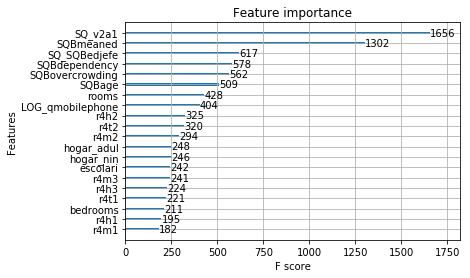

In [93]:
# From XGBoost
xgb.plot_importance(clf_xgb, max_num_features=20)